# Mushroom Project

# Problem Statement:

Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Thus, in this project, you have to predict the "Class" column. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

Now, Let's Import the data from dataset.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv',encoding='ISO-8859-1',low_memory=False)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


With this we can see that there are 8124 columns and 23 columns

We can also view this using shape function

In [3]:
df.shape

(8124, 23)

Now lets view the Column name, Non Null Count and Datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

From above we noticed that there is not even one non-null columns and DataType is Object and it is a classification problem as we need to indetify which Feature is Poisnoous and Eatables

Also, we are not able to visulaise all 23 column, so lets use columns functions in Dataframe to list all 23 columns

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

We can also check the dataype and column names using dtypes

In [7]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object



Next, we need to check if our data is balanced or not. Lets visualise this using countplot

[]

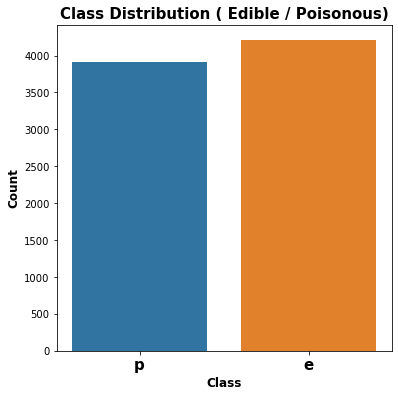

In [8]:
plt.figure(figsize=(6,6))

sns.countplot(x='class' , data=df , alpha=1 , linewidth=2)
plt.title('Class Distribution ( Edible / Poisonous)' , fontweight='bold' , size=15)

plt.xlabel('Class' ,fontweight='bold' , size = 12)
plt.ylabel('Count' ,fontweight='bold' , size = 12)

plt.xticks(fontweight='bold' , size=15)

plt.plot()

In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

From the count plot above we notice that the data is balanced. There are 4208 records which are Edible and 3916 are posinous which we found using value_counts() also. There is not much difference between edible and poisonous data

In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


We see that veil-type has only one type of data, so going further we can delete this COlumn

# Visualize all the features

In [11]:
#Since we dont need class, so features will ignore the class column
features = df.columns[1:].tolist()
features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

<AxesSubplot:xlabel='cap-color', ylabel='count'>

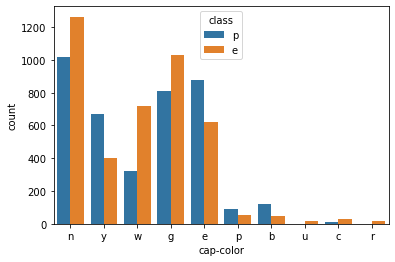

In [12]:
#Check one sample feature("cap-color")
sns.countplot(x='cap-color',hue='class',data=df)

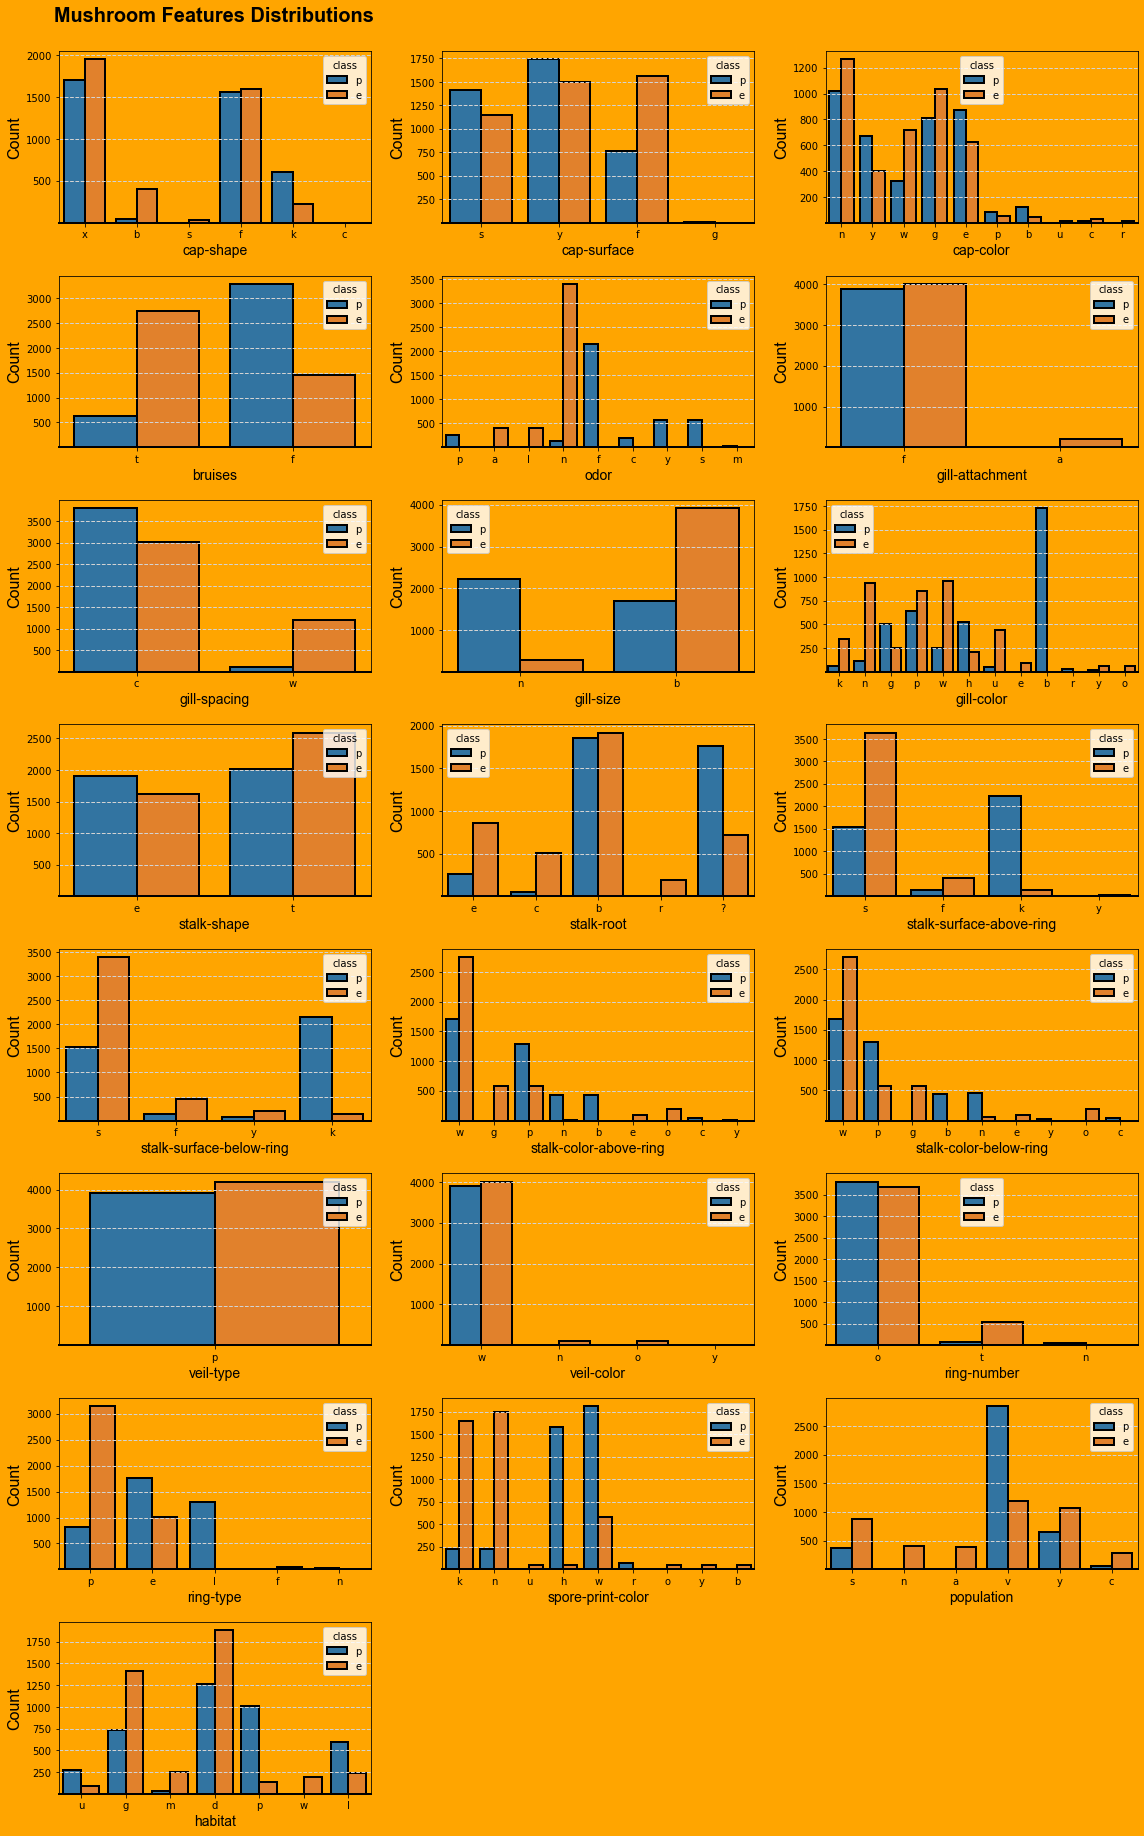

In [13]:
#Since we have 23 columns, we will divide the graph into 8 rows and 3 columns

rows = 8
cols = 3
fig = plt.figure(figsize=(16, 25))
fig.set_facecolor("orange")

#enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element.
for idx, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.set_facecolor("orange")
    
    ax.grid(axis="y", linewidth=1, color="lightgrey", linestyle="--")
#Visulaise all the features with each graph border as black
    sns.countplot(x=feature,hue='class',ec="black", alpha=1,data=df,linewidth=2)
#Lets set ylabel and xlabel
    ax.set_ylabel("Count", fontsize=16, fontfamily="arial")        
    ax.set_xlabel(feature, fontsize=14, fontfamily="arial")
    ax.spines["bottom"].set(linewidth=2)
    ax.set_ylim(1)

fig.text(x=0.05, y=1.01, s="Mushroom Features Distributions", fontsize=20, fontweight="bold", fontfamily="arial")
#We are using fig.tight_layout so that graph gets populated just below Features Distributions
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

The above graph gives us the count of edible or poisonous under each feature, also it shows that veil-type has only one unique value and hence won't contribute anything to the data. So we can safely remove it. Lets check unique values for viel-type and all features below

# Check Unique Values

We already seen above in decribe method that veil-type is unique, Below are other method to test

In [14]:
veilTypeuniqueValues = df['veil-type'].nunique()
print('Number of unique values in column "veil-type" of the dataframe :',veilTypeuniqueValues)

Number of unique values in column "veil-type" of the dataframe : 1


In [15]:
#Print frequency of categories
for col in features:
    print ('\nFrequency of Categories for Feature %s'%col)
    print (df[col].value_counts())


Frequency of Categories for Feature cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Frequency of Categories for Feature cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

Frequency of Categories for Feature cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

Frequency of Categories for Feature bruises
f    4748
t    3376
Name: bruises, dtype: int64

Frequency of Categories for Feature odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

Frequency of Categories for Feature gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

Frequency of Categories for Feature gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

Frequency of Categories for Feature gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

Frequ

The data is categorical so we will use "LabelEncoder" to convert it to ordinal as LabelEncoder converts each value in a column to a number.

This approach requires the category column to be of ‘category’ datatype. By default, a non-numerical column is of ‘object’ datatype. From the df.info() method, we saw that our columns are of ‘object’ datatype. So we will have to change the type to ‘category’ before using LabelEncoder as shown below

In [16]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Now that we have converted the columns to be of category type, we can use LabelEncoder to make the columns into machine understandable format.

# LabelEncoder 

In [17]:
# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Heatmap

<AxesSubplot:>

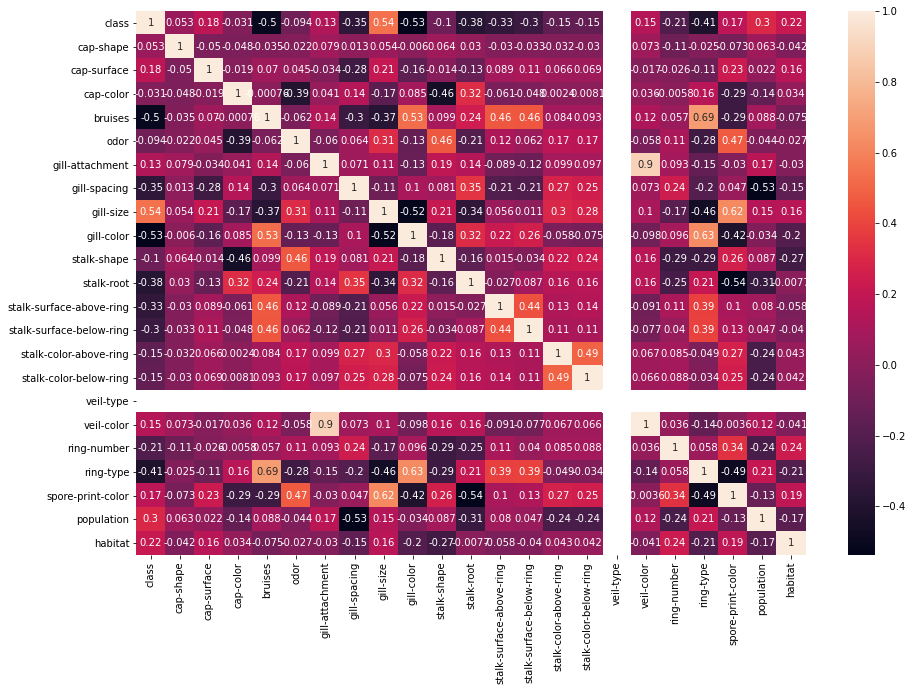

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

In [19]:
corr_matrix=df.corr()
corr_matrix['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

The Heatmap and correlation technique used above gives us the correlation between class and other features, where some of the features are positively correlated and others are negatively correlated.

Few examples are below:

Correlation between gill-size and class is 0.54

Correlation between gill-color and class is -0.53

In [20]:
x=df.drop('class',axis=1) #Predictors
y=df['class'] #target
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


From the count plot above and the unique value check down and looking at the data also, we can safely remove the veil-type feature

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [22]:
df = df.drop(["veil-type"],axis=1)

Here axis-1 means we are droping the entire column(ie. vertically), if it was axis-0 we would be dropping the entire row(ie. horizontally).

In [23]:
#Check if viel-type is removed or not.
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
# "class" column as numpy array.
y = df["class"].values
# All data except "class" column.
x = df.drop(["class"], axis=1).values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=55,test_size=0.35)

In [25]:
x_train.shape

(5280, 21)

Now lets use different Classification methods to check accuracy of the data

In [26]:
y_train.shape

(5280,)

In [27]:
x_test.shape

(2844, 21)

In [28]:
y_test.shape

(2844,)

From above analysis we can see the count of x an y data being tested and trained

X_train : 5280 rows and 21 columns

Y_train : 5280 rows
    
x_test : 2844 rows and 21 columns
    
y_test : 2844 rows

# Classification Methods

# 1) Logistic Regression

Logistic Regression is a go-to method for binary classification problems (problems with two class values). 

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.


In [29]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy_score : 0.9546413502109705
[[1409   60]
 [  69 1306]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1469
           1       0.96      0.95      0.95      1375

    accuracy                           0.95      2844
   macro avg       0.95      0.95      0.95      2844
weighted avg       0.95      0.95      0.95      2844



So, we have an accuracy of 95.4% which is extremely good.

Also we had 2844 records under x_test to be predicted.

Out of 2844, 1409 are True Positive and 1306 are False Negaitve, which means our model predicted 2715 records correctly.

129 records were not predicted correclty, which means our model out of 2844 predicted wrong values.

# 2) KNN Classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
    prediction=knn.predict(x_test)
    print("Confusion Matrix with k-nearest neighbour value",i,"\n",'-'*35,"\n",confusion_matrix(y_test,prediction))

print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))


Confusion Matrix with k-nearest neighbour value 1 
 ----------------------------------- 
 [[1469    0]
 [   0 1375]]
Confusion Matrix with k-nearest neighbour value 2 
 ----------------------------------- 
 [[1469    0]
 [   1 1374]]
Confusion Matrix with k-nearest neighbour value 3 
 ----------------------------------- 
 [[1468    1]
 [   0 1375]]
Confusion Matrix with k-nearest neighbour value 4 
 ----------------------------------- 
 [[1469    0]
 [   0 1375]]
Confusion Matrix with k-nearest neighbour value 5 
 ----------------------------------- 
 [[1468    1]
 [   0 1375]]
Confusion Matrix with k-nearest neighbour value 6 
 ----------------------------------- 
 [[1468    1]
 [   4 1371]]
Confusion Matrix with k-nearest neighbour value 7 
 ----------------------------------- 
 [[1466    3]
 [   3 1372]]
Confusion Matrix with k-nearest neighbour value 8 
 ----------------------------------- 
 [[1468    1]
 [   6 1369]]
Confusion Matrix with k-nearest neighbour value 9 
 ------------

We can see that knn is returning the accuracy as 100% with Best K-nearest neighbour value as 1

# 3) SVM Classification

In [32]:
from sklearn.svm import SVC

svm = SVC(random_state=43, gamma="auto")
svm.fit(x_train,y_train)
svm.score(x_train,y_train)
prediction=svm.predict(x_test)
print('Accuracy score of SVM is :',accuracy_score(y_test,prediction))
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy score of SVM is : 1.0
Confusion Matrix
 ----------------------------------- 
 [[1469    0]
 [   0 1375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1469
           1       1.00      1.00      1.00      1375

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



SVM is also predicting close to 100%

# 4) Naive Byes Classification

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_train,y_train)
prediction=nb.predict(x_test)
print('Accuracy score of Naive Byes Classifier is :',accuracy_score(y_test,prediction))
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy score of Naive Byes Classifier is : 0.9229957805907173
Confusion Matrix
 ----------------------------------- 
 [[1345  124]
 [  95 1280]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1469
           1       0.91      0.93      0.92      1375

    accuracy                           0.92      2844
   macro avg       0.92      0.92      0.92      2844
weighted avg       0.92      0.92      0.92      2844



Naive Bayes Classifier is also predicting 92.29%

# 5) Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
prediction=dt.predict(x_test)
print('Accuracy score of DecisionTreeClassifier is :',accuracy_score(y_test,prediction))
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy score of DecisionTreeClassifier is : 1.0
Confusion Matrix
 ----------------------------------- 
 [[1469    0]
 [   0 1375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1469
           1       1.00      1.00      1.00      1375

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



Decision Tree Classification is also predicting close to 100%

# 6) Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=43)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
prediction=rf.predict(x_test)
print('Accuracy score of DecisionTreeClassifier is :',accuracy_score(y_test,prediction))
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy score of DecisionTreeClassifier is : 1.0
Confusion Matrix
 ----------------------------------- 
 [[1469    0]
 [   0 1375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1469
           1       1.00      1.00      1.00      1375

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



RandomForestClassifier is also predicting close to 100%, Please note that we have used the same random state that is used in SVM Classification

We tested different Classification Algorithms and noticed that each one of them is giving the same accuracy

Logistic Regression's accuracy was 95.46%, Naive Byes is 92.29% and all others predicted 100%.

In [36]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [39]:
from sklearn import metrics
y_pred=ada.predict(x_train)
accuracy=metrics.r2_score(y_train,y_pred)
print('R2 Score is :',accuracy)

R2 Score is : 0.9278251196665088


Since the model has already seen the data, it is producing better R2 Score with an accuracy of 92.78%

So, Now lets predict the Test Data

In [40]:
y_test_pred=ada.predict(x_test)

In [41]:
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R2 Score is :',accuracy)

R2 Score is : 0.926998913678365


It is printing almost the same percentage with Test Data also. R2 Score is 92.69%

# Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lg,x,y,cv=5)
print('Cross Validation score of Logistic Regression model is :',scr.mean())

Cross Validation score of Logistic Regression model is : 0.8393488442591892


In [43]:
scr=cross_val_score(knn,x,y,cv=5)
print('Cross Validation score of KNN model is :',scr.mean())

Cross Validation score of KNN model is : 0.8843893899204245


In [44]:
scr=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score of Random Forest is :',scr.mean())

Cross Validation score of Random Forest is : 0.8985415687760515


In [45]:
scr=cross_val_score(svm,x,y,cv=5)
print('Cross Validation score of SVM model is :',scr.mean())

Cross Validation score of SVM model is : 0.8645586206896552


In [46]:
scr=cross_val_score(nb,x,y,cv=5)
print('Cross Validation score of Naive Byes model is :',scr.mean())

Cross Validation score of Naive Byes model is : 0.7259685486926866


In [47]:
scr=cross_val_score(dt,x,y,cv=5)
print('Cross Validation score of Decision Tree model is :',scr.mean())

Cross Validation score of Decision Tree model is : 0.9339998484274347


Average Cross Validation score of Logistic Regression model is 83.93%

Average Cross Validation score of KNN model is :88.43%

Average Cross Validation score of Random Forest is 89.85%

Average Cross Validation score of SVM is 86.45%

Average Cross Validation score of Naive Byes model is 72.59%

Average Cross Validation score of Decision Tree is 93.39%

The best performing model in order is Decision Tree and then < Random Forest <KNN < SVM < Logistic Regression < Naive Byes

So we will go with Decision Tree Model for our problem as it is less overfitted than Random Forest, though accuracy of all(100%), except Logistic Regression(95.4%) and Naive Byes(92.29%) are same

We can also select the model which has the least differnece between the Cross Validation and accuracy or the model most of the times.

In either of the case, Decision Tree suits the best


# HyperParameter Tuning using Grid Search CV

In [48]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [49]:
parameters

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [4, 5, 6, 7, 8],
 'criterion': ['gini', 'entropy']}

In [50]:
#Doing the GridSearchCV for our model which in this case is DecisionTreeClassifier

GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring="accuracy")

#Fit the data in the model
GCV.fit(x_train,y_train)

#Print the best Parameters found by GridSearchCV
GCV.best_params_ 

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [51]:
#Predicting the best parameter
GCV_pred=GCV.best_estimator_.predict(x_test)

#Checking the final accuracy
accuracy_score(y_test,GCV_pred)

0.9880450070323488

Earlier the accuracy was 100% and now it is 99.89%, so we can conclude the data is like this and there is no overfiting in our model

# ROC AUC Plot

In [52]:
from sklearn.metrics import plot_roc_curve

ROC is an evaluation metrics for Binary Classification problems and it is going to make a curve that plots the True Positive Rate against the False Positive rate at various threshold values and essentially it separates the signal from the noise. So if,the ROC Score is closer to 1, then it means the model is performing well or in laymen term the performance of the model is good.AUC is the measure of the ability of the classifier that distinguish between the classes and it is used as the summary of the ROC curve.The highher the AUC, the better the performance of the model and it can distinguish between the positive and negative classes.

If we get the AUC closer to 0, it means the classifier would be predicting all negative as positive and all positive as negative.It means the model is not performing well.

If the ROC AUC range is between 0.5 to 1 then it means there is high chance that the classifier will be able to differentiate between the postive class value from the negative class values.

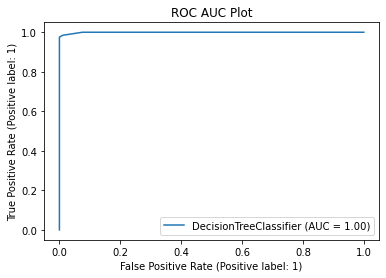

In [53]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

So final accuracy is 98.62% and AUC Score is 100% which is pretty good.

# Saving the model in Pickle Format

In [56]:
import pickle
filename="GilledMushroomProject1.pkl"
pickle.dump(dt, open(filename,'wb',-1))
#pickle.dump(dt,open(filename,'wb'))